# USING WELLY AND LASIO FOR WELL LOG DATA

Welly and Lasio are popular Python libraries used for working with well log data in the geoscience domain. They provide efficient and convenient tools for reading, writing, and manipulating well log data in various formats.

In [1]:
#Installing the welly and lasio libraries in our jupyter notebook
!pip install lasio
!pip install welly

Lasio is a popular Python library specifically designed for reading and writing LAS files. It provides a straightforward API to load LAS files into memory, extract well log data, and manipulate them. Lasio is known for its simplicity and efficiency, making it a preferred choice for working with LAS files

# Loading and accessing well log data using Lasio

In [2]:
#We will be using the pandas and matplotlib library later on
import lasio
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
## Lasio includes a read function just like Pandas
las=lasio.read('15-9-19_SR_COMP.LAS')


Let's take a look at the content, particularly the header and curves information.

In [4]:
# WE CAN USE THE .well FUNCTION TO VIEW THE DESCRIPTION OF INFORMATION WITHIN THE HEADER
print(las.well)

Mnemonic  Unit  Value       Description       
--------  ----  -----       -----------       
STRT      M     102.1568    Top Depth         
STOP      M     4636.514    Bottom Depth      
STEP      M     0.1524      Depth Increment   
NULL            -999.25     Null Value        
FLD             Q15         Field Name        
WELL            15/9-19     NAME              
WBN             15/9-19 SR  WELLBORE          
NATI            NOR         COUNTRY           
CTRY            NOR         COUNTRY           
COMP            STATOIL     OPERATOR          
PDAT            MSL         PERM DATUM        
COUN            NORTH SEA   RIG NAME          
STAT            NORWAY      STATE             
PBWE            15/9-19     PB WELL ID        
APIN            15/9-19 SR  PB WELLBORE ID    
PBWS            ALL         PB WELL NAME SET  


Using a for loop we can clean this up, combining the description and the mnemonic,and the values.


In [5]:
for item in las.sections['Well']: ## `las.section` contains the header and curve information accessible as one function
  print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}") 

Top Depth (STRT): 		 102.1568
Bottom Depth (STOP): 		 4636.514
Depth Increment (STEP): 		 0.1524
Null Value (NULL): 		 -999.25
Field Name (FLD): 		 Q15
NAME (WELL): 		 15/9-19
WELLBORE (WBN): 		 15/9-19 SR
COUNTRY (NATI): 		 NOR
COUNTRY (CTRY): 		 NOR
OPERATOR (COMP): 		 STATOIL
PERM DATUM (PDAT): 		 MSL
RIG NAME (COUN): 		 NORTH SEA
STATE (STAT): 		 NORWAY
PB WELL ID (PBWE): 		 15/9-19
PB WELLBORE ID (APIN): 		 15/9-19 SR
PB WELL NAME SET (PBWS): 		 ALL


In [6]:
# Using .curves to print out curves that are present, we  can have a view of what is in this file 
print(las.curves) #using the print function makes it more readable

Mnemonic  Unit  Value         Description                       
--------  ----  -----         -----------                       
DEPT      M     00 001 00 00  1  DEPTH                          
AC        US/F                2  Sonic Transit Time (Slowness)  
CALI      IN                  3  Caliper                        
DEN       G/CC                4  Bulk Density                   
GR        GAPI                5  Gamma Ray                      
NEU       %                   6  Neutron Porosity               
RDEP      OHMM                7  Deep Resistivity               
RMED      OHMM                8  Medium Resistivity             


In [7]:
# Extracting information on the curve mnemonic using for loop
for curve in las.curves:
    print(curve.mnemonic)

DEPT
AC
CALI
DEN
GR
NEU
RDEP
RMED


In [8]:
# We can alo see the array of depth values using .index
las.index

array([ 102.1568,  102.3092,  102.4616, ..., 4636.2092, 4636.3616,
       4636.514 ])

In [9]:
# Converting las file to dataframe
Well=las.df()
Well.head()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN


In [10]:
Well.describe()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
count,7007.000000,7007.000000,7084.000000,28117.000000,7096.000000,12223.000000,12223.000000
mean,79.498714,9.611068,2.449055,71.986798,20.117166,2.438382,2.386781
std,18.390705,1.019751,0.165122,32.922780,14.729530,6.631202,5.735731
min,1.025100,6.000000,1.943000,2.766100,2.178300,0.250300,0.179000
25%,66.154350,9.142900,2.319975,50.255200,10.631350,0.988000,0.847850
50%,74.661900,9.589400,2.505600,74.998500,15.718550,1.536100,1.490800
75%,93.304550,9.904800,2.585125,92.343800,25.067375,2.434050,2.415400
max,181.813900,20.330400,3.001300,304.333700,146.347400,198.537100,168.604400


# WELLY FOR MANIPULATION AND PLOTTING

In [11]:
from welly import Well
well=Well.from_las('15-9-19_SR_COMP.LAS')

In [12]:
# By simply calling well, Welly helps print out the data
well

Well(uwi: '', name: '15/9-19', 7 curves: ['AC', 'CALI', 'DEN', 'GR', 'NEU', 'RDEP', 'RMED'])

In [13]:
# To get the full header,we can use the .header function
well.header

,original_mnemonic,mnemonic,unit,value,descr,section
0,VERS,VERS,,2.0,CWLS Log ASCII Standard-VERSION 2.0,Version
1,WRAP,WRAP,,NO,One line per depth step,Version
2,STRT,STRT,M,102.1568,Top Depth,Well
3,STOP,STOP,M,4636.514,Bottom Depth,Well
4,STEP,STEP,M,0.1524,Depth Increment,Well
5,NULL,NULL,,-999.25,Null Value,Well
6,FLD,FLD,,Q15,Field Name,Well
7,WELL,WELL,,15/9-19,NAME,Well
8,WBN,WBN,,15/9-19 SR,WELLBORE,Well
9,NATI,NATI,,NOR,COUNTRY,Well


In [14]:
df=well.header
df.head()

,original_mnemonic,mnemonic,unit,value,descr,section
0,VERS,VERS,,2.0,CWLS Log ASCII Standard-VERSION 2.0,Version
1,WRAP,WRAP,,NO,One line per depth step,Version
2,STRT,STRT,M,102.1568,Top Depth,Well
3,STOP,STOP,M,4636.514,Bottom Depth,Well
4,STEP,STEP,M,0.1524,Depth Increment,Well


Using the .data function allows us to have more detail on the curves contained including their mnemonics, units, depth range, step, and count.

In [15]:
well.data

{'AC': Curve(mnemonic=AC, units=US/F, start=102.1568, stop=4636.5140, step=0.1524, count=[7007]),
 'CALI': Curve(mnemonic=CALI, units=IN, start=102.1568, stop=4636.5140, step=0.1524, count=[7007]),
 'DEN': Curve(mnemonic=DEN, units=G/CC, start=102.1568, stop=4636.5140, step=0.1524, count=[7084]),
 'GR': Curve(mnemonic=GR, units=GAPI, start=102.1568, stop=4636.5140, step=0.1524, count=[28117]),
 'NEU': Curve(mnemonic=NEU, units=%, start=102.1568, stop=4636.5140, step=0.1524, count=[7096]),
 'RDEP': Curve(mnemonic=RDEP, units=OHMM, start=102.1568, stop=4636.5140, step=0.1524, count=[12223]),
 'RMED': Curve(mnemonic=RMED, units=OHMM, start=102.1568, stop=4636.5140, step=0.1524, count=[12223])}

In [16]:
# We can generate range of information about the gamma ray curve ('GR') by creating a new variable gamma_ray which provides these information
gamma_ray=well.data['GR']
gamma_ray

Curve(mnemonic=GR, units=GAPI, start=102.1568, stop=4636.5140, step=0.1524, count=[28117])

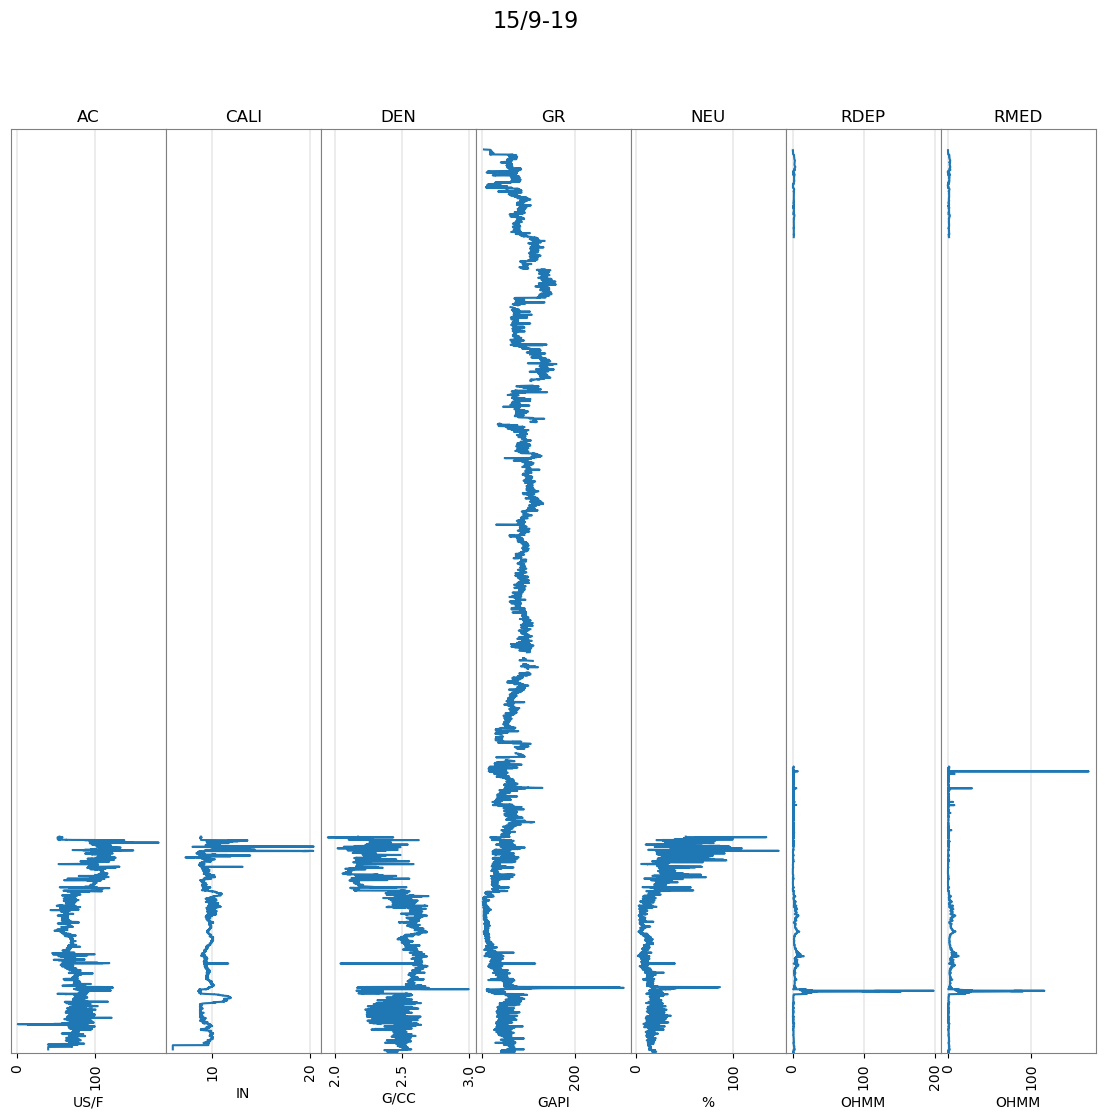

In [17]:
# using .plot() it helps to generate plots of all of our well logs
well.plot()


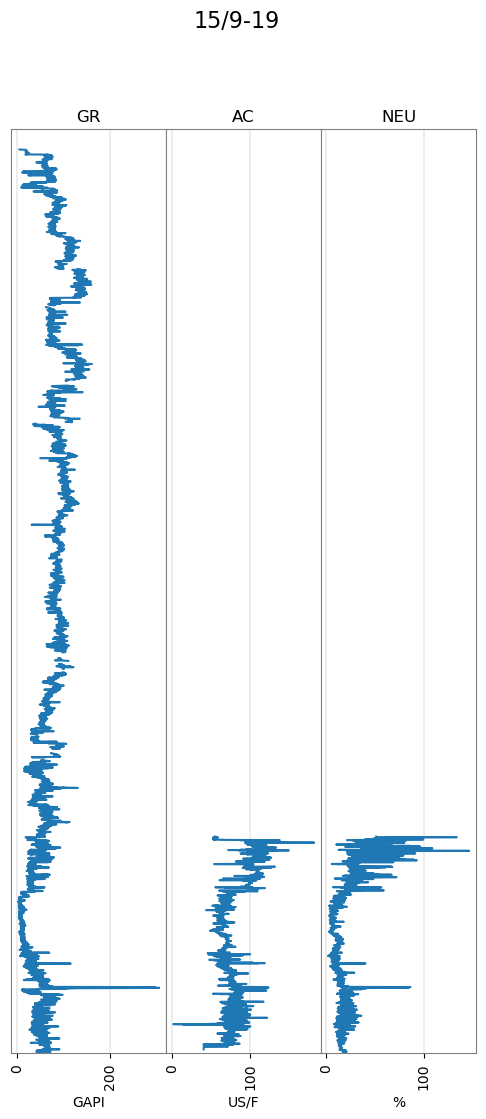

In [19]:
## Let's make a list of tracks we want to see
tracks=['GR','AC','NEU']
well.plot(tracks = tracks) ## You could type your tracks directly into the () and bypass the tracks. The tracks list is helpful if you looping through many well and want to export the figures

In welly, the basis is the unique depth range for every curve, where it is present!

In [20]:
#  We can see that GR is present over the depth range 102.1568 - 4636.514

gamma_ray.basis

array([ 102.1568,  102.3092,  102.4616, ..., 4636.2092, 4636.3616,
       4636.514 ])

In [22]:
well.data['RDEP'].basis

array([ 102.1568,  102.3092,  102.4616, ..., 4636.2092, 4636.3616,
       4636.514 ])

<AxesSubplot:title={'center':'CALI'}, xlabel='IN'>

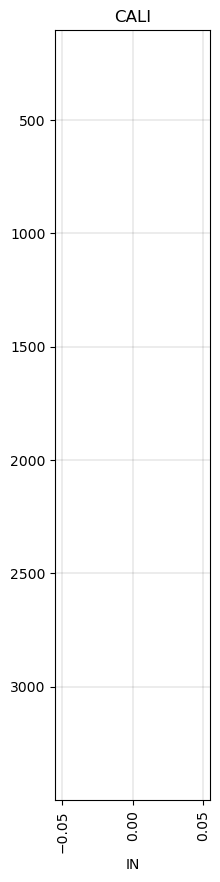

In [25]:
# we can also use the basis to control how much of the well we want to see.
well.data['CALI'].to_basis(start=103, stop=3500).plot()# we used 103 as the start and 3500 as the stop. 
#It doesn't display any reading.
#WHY??
# CELL 26 shows the 'CALI' well log reading started from 3545


<AxesSubplot:title={'center':'CALI'}, xlabel='IN'>

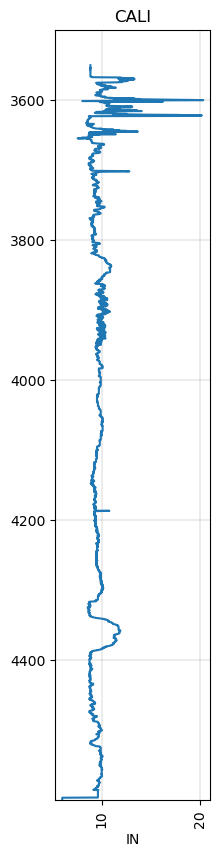

In [36]:
well.data['CALI'].to_basis(start=3500, stop=4600).plot()

<AxesSubplot:title={'center':'GR'}, xlabel='GAPI'>

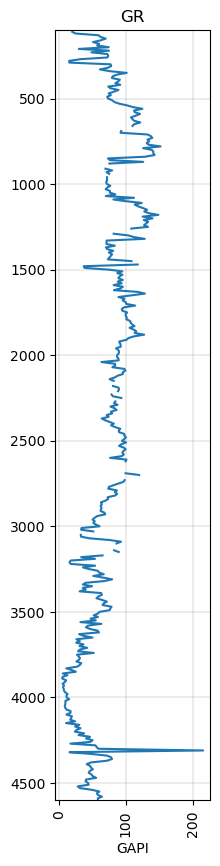

In [28]:
# we can also subsample our data by using step
#Let's say we wanted to subsmaple our data every 10th step
gamma_ray.to_basis(start = 100, stop=4600, step=10).plot()

<AxesSubplot:>

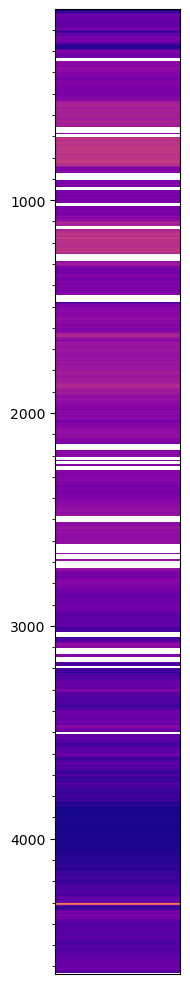

In [37]:
gamma_ray.plot_2d(cmap='plasma') ## Showing the 2D image plot


<AxesSubplot:>

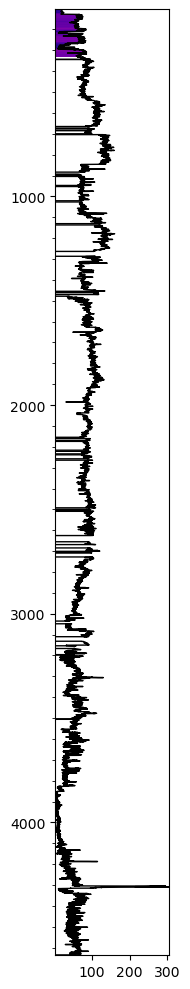

In [38]:
## Showing the 2D image plot  and adding the curve cutout on top
gamma_ray.plot_2d(cmap='plasma', curve=True)

These examples demonstrate some basic functionalities of Welly and Lasio for working with well log data. You can further explore these libraries and showcase more advanced techniques, such as data analysis, statistical calculations, or machine learning applications with well log data, depending on your specific goals and interests.